In [1]:
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from scipy.misc import toimage
from matplotlib import pyplot


# LOAD train and test data and use one hot encoding
from tflearn.datasets import cifar10
(X, Y_img_id), (X_test, Y_test_img_id) = cifar10.load_data()
X_validation=X_test[0:25]
X, Y_img_id = shuffle(X,Y_img_id)
Y = to_categorical(Y_img_id, 10)
Y_test = to_categorical(Y_test_img_id, 10)


hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


100.0% 170500096 / 170498071


('Succesfully downloaded', 'cifar-10-python.tar.gz', 170498071, 'bytes.')
File Extracted in Current Directory


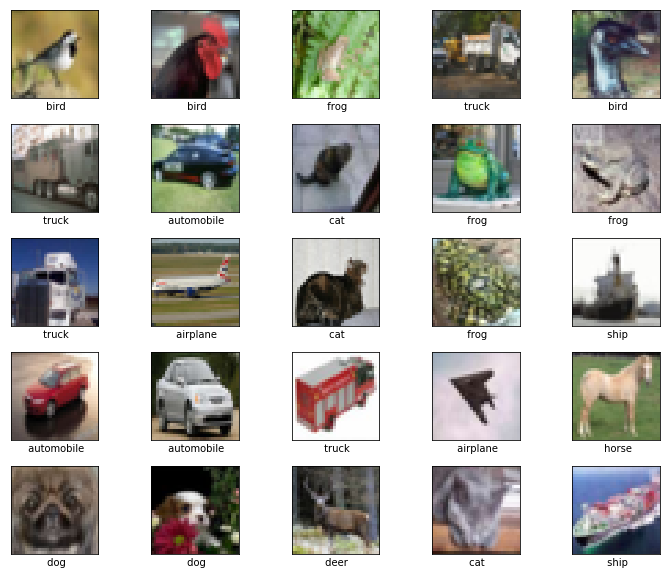

In [2]:
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
'horse', 'ship', 'truck']
fig, axes = pyplot.subplots(nrows=5, ncols=5, sharex=True, sharey=True,figsize=(12, 10),subplot_kw={'adjustable': 'box-forced'})
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(X[i].reshape(32, 32, 3))
    xlabel = " {0}".format(LABELS[Y_img_id[i]])

    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])
pyplot.show()

In [3]:


# Make   the data Normalize and centralize  
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Create more training data by flipping, rotating
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

# Convolutional network building
cnn = input_data(shape=[None, 32, 32, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)
cnn = conv_2d(cnn, 32, 3, activation='relu')
cnn = max_pool_2d(cnn, 2)
cnn = conv_2d(cnn, 64, 3, activation='relu')
cnn = conv_2d(cnn, 64, 3, activation='relu')
cnn = max_pool_2d(cnn, 2)
cnn = fully_connected(cnn, 512, activation='relu')
cnn = dropout(cnn, 0.5)
cnn = fully_connected(cnn, 10, activation='softmax')
cnn = regression(cnn, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

# Train using classifier
model = tflearn.DNN(cnn, tensorboard_verbose=0)
model.fit(X, Y, n_epoch=5, shuffle=True, validation_set=(X_test, Y_test),show_metric=True, batch_size=96, run_id='cnn_cifar10')

Training Step: 2604  | total loss: 0.82811 | time: 149.650s
| Adam | epoch: 005 | loss: 0.82811 - acc: 0.7252 -- iter: 49920/50000
Training Step: 2605  | total loss: 0.81609 | time: 158.780s
| Adam | epoch: 005 | loss: 0.81609 - acc: 0.7266 | val_loss: 0.73670 - val_acc: 0.7510 -- iter: 50000/50000
--


In [4]:
model.save('cnn_cifar10.tflearn')

INFO:tensorflow:/notebooks/cnn_cifar10.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [5]:
reloaded_model=model.load('cnn_cifar10.tflearn')



INFO:tensorflow:Restoring parameters from /notebooks/cnn_cifar10.tflearn


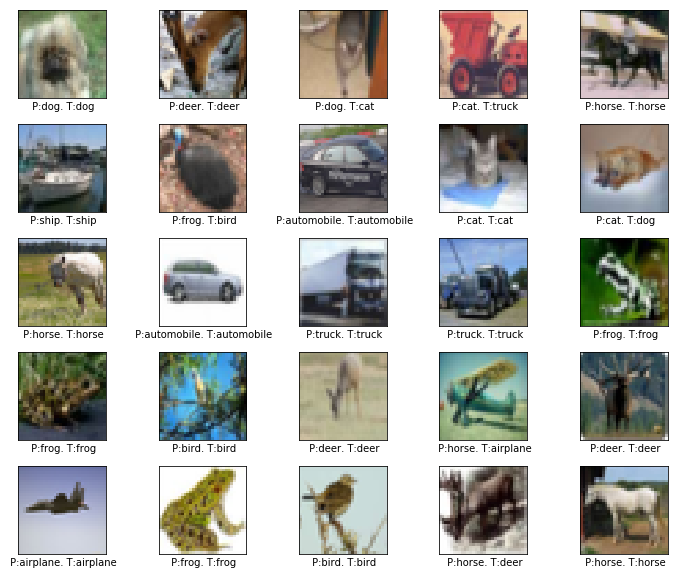

In [8]:
import copy

(X, Y_img_id), (X_test, Y_test_img_id) = cifar10.load_data()
X_test, Y_test_img_id = shuffle(X_test,Y_test_img_id)

X_validation=X_test[0:25]
X_show = copy.deepcopy(X_validation)
Y_validation_predicted=model.predict(X_validation)

fig, axes = pyplot.subplots(nrows=5, ncols=5, sharex=True, sharey=True,figsize=(12, 10),subplot_kw={'adjustable': 'box-forced'})
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(X_show[i].reshape(32, 32, 3))
    image_id=Y_validation_predicted[i].argmax(axis=0)
    # Show true and predicted classes.

    xlabel = " P:{0}. T:{1}".format(LABELS[image_id],LABELS[Y_test_img_id[i]])

    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])
pyplot.show()